<a href="https://colab.research.google.com/github/VarvaraSharutina/mo-ad/blob/main/%D0%BC%D0%BE%D0%B0%D0%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Классификация контента Amazon Prime на фильмы и TV-шоу на основе их характеристик (год выпуска, страна, рейтинг, продолжительность, жанр и т.д.)

1. Чтение данных

In [186]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer, StandardScaler


In [165]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("shivamb/amazon-prime-movies-and-tv-shows")

file_path = path + "/amazon_prime_titles.csv"
data_raw = pd.read_csv(file_path)

Using Colab cache for faster access to the 'amazon-prime-movies-and-tv-shows' dataset.


In [166]:
data_raw

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,s9664,Movie,Pride Of The Bowery,Joseph H. Lewis,"Leo Gorcey, Bobby Jordan",NaN,NaN,1940,7+,60 min,Comedy,New York City street principles get an East Si...
9664,s9665,TV Show,Planet Patrol,NaN,"DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...",NaN,NaN,2018,13+,4 Seasons,TV Shows,"This is Earth, 2100AD - and these are the adve..."
9665,s9666,Movie,Outpost,Steve Barker,"Ray Stevenson, Julian Wadham, Richard Brake, M...",NaN,NaN,2008,R,90 min,Action,"In war-torn Eastern Europe, a world-weary grou..."
9666,s9667,TV Show,Maradona: Blessed Dream,NaN,"Esteban Recagno, Ezequiel Stremiz, Luciano Vit...",NaN,NaN,2021,TV-MA,1 Season,"Drama, Sports","The series tells the story of Diego Maradona, ..."


In [167]:
data_raw.shape

(9668, 12)

In [168]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


2. Разбиение данных на тестовую и обучающую выборку

In [169]:
from sklearn.model_selection import train_test_split

X = data_raw.drop('listed_in', axis=1)
y = data_raw['listed_in']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(7251, 2417)

3. Визуализация данных и вычисление основных характеристик, интерпретация  

4. Обработка пропущенных значений

In [170]:
X_train.isnull().sum()

,0
show_id,0
type,0
title,0
director,1551
cast,918
country,6745
date_added,7135
release_year,0
rating,252
duration,0


In [171]:
cols_to_fill = ['director', 'cast', 'country', 'rating', 'date_added', 'duration']
for col in cols_to_fill:
    X_train[col] = X_train[col].fillna('unknown')

print("\nПосле обработки пропусков:")
X_train.isnull().sum()


После обработки пропусков:


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


5. Обработка категориальных признаков

In [172]:
X_train['type'] = X_train['type'].astype('category')
X_train['rating'] = X_train['rating'].astype('category')

In [173]:
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer
enc = OneHotEncoder(drop='if_binary', sparse_output=False)
enc.fit(X_train[['type','rating']])

OneHotEncoder(drop='if_binary', sparse_output=False)

In [174]:
dummies = pd.DataFrame(enc.transform(X_train[['type', 'rating']]),
                       columns=enc.get_feature_names_out(), index=X_train.index)
countries_split = X_train['country'].str.split(',').apply(
    lambda x: [item.strip() for item in x] if isinstance(x, list) else []
)
mlb = MultiLabelBinarizer()
country_encoded = mlb.fit_transform(countries_split)
country_df = pd.DataFrame(country_encoded,
                         columns=mlb.classes_,
                         index=X_train.index)
country_df = country_df.add_prefix('country_')


# Объединяем
dummies = pd.concat([dummies, country_df], axis=1)
dummies.head()

,type_TV Show,rating_13+,rating_16,rating_16+,rating_18+,rating_7+,rating_AGES_18_,rating_ALL,rating_ALL_AGES,rating_G,...,country_South Africa,country_South Korea,country_Spain,country_Sweden,country_Switzerland,country_Thailand,country_United Arab Emirates,country_United Kingdom,country_United States,country_unknown
9547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
9458,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
6143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
5981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [175]:
X_train = pd.concat((X_train, dummies), axis=1).drop(['type', 'rating', 'country'], axis=1)

In [176]:
X_train.head()

,show_id,title,director,cast,date_added,release_year,duration,description,type_TV Show,rating_13+,...,country_South Africa,country_South Korea,country_Spain,country_Sweden,country_Switzerland,country_Thailand,country_United Arab Emirates,country_United Kingdom,country_United States,country_unknown
9547,s9548,Hero and the Terror,William Tannen,"Chuck Norris, Brynn Thayer, Steve James, Jack ...",unknown,1988,97 min,A murderer (Jack O'Halloran) escapes from an i...,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
9458,s9459,Dangerous Afternoon,Charles Saunders,"Nora Nicholson, Ruth Dunning",unknown,1961,59 min,A boarding house run by a former criminal who'...,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
6143,s6144,Crimson Romance,David Howard,"Ben Lyon, Sari Maritza, Erich Von Stroheim, Ha...",unknown,1934,58 min,German-American Fred von Bergenwhose (Albright...,0.0,1.0,...,0,0,0,0,0,0,0,0,0,1
5981,s5982,Fugitive Pieces,Jeremy Podeswa,"Stephen Dillane, Rosamund Pike, Nina Dobrev, R...",unknown,2008,106 min,"Based on the bestselling novel, 'Fugitive Piec...",0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
8726,s8727,Act 5 - Series 2,unknown,1,unknown,2021,1 Season,2,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1


6. Нормализация

In [179]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

if 'release_year' in X_train.columns:
    release_year_train = X_train[['release_year']].copy()
    release_year_test = X_test[['release_year']].copy() if 'release_year' in X_test.columns else None

    minmax_scaler = MinMaxScaler()

    release_year_normalized = minmax_scaler.fit_transform(release_year_train)

    release_year_normalized_df = pd.DataFrame(
        release_year_normalized,
        columns=['release_year_normalized'],
        index=X_train.index
    )

    print(f"\nПосле нормализации release_year:")
    print(f"Min: {release_year_normalized_df['release_year_normalized'].min():.3f}")
    print(f"Max: {release_year_normalized_df['release_year_normalized'].max():.3f}")
    print(f"Mean: {release_year_normalized_df['release_year_normalized'].mean():.3f}")


    X_train_normalized = X_train.copy()
    X_train_normalized['release_year'] = release_year_normalized_df['release_year_normalized']


После нормализации release_year:
Min: 0.000
Max: 1.000
Mean: 0.874


7. Запуск классификатора

Оставляем 10 самых популярных жанров:
1. Drama: 2216 записей
2. Action: 1657 записей
3. Comedy: 1475 записей
4. Documentary: 913 записей
5. Horror: 535 записей
6. Animation: 498 записей
7. Arts: 457 записей
8. Kids: 373 записей
9. TV Shows: 263 записей
10. Suspense: 194 записей

Всего записей после фильтрации: 8581
Количество классов: 10

Размер обучающей выборки: 6864
Размер тестовой выборки: 1717


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['Egypt', 'Hong Kong', 'Poland'] will be ignored
  warnings.warn(



Результаты для 10 самых популярных жанров:
Accuracy: 0.4898078043098428
F1 (macro): 0.4240201570548969

Classification report:

              precision    recall  f1-score   support

      Action       0.53      0.48      0.50       331
   Animation       0.61      0.51      0.56       100
        Arts       0.83      0.47      0.60        91
      Comedy       0.47      0.23      0.31       295
 Documentary       0.60      0.61      0.61       183
       Drama       0.41      0.80      0.54       443
      Horror       0.60      0.08      0.15       107
        Kids       0.74      0.43      0.54        75
    Suspense       1.00      0.08      0.14        39
    TV Shows       0.50      0.21      0.29        53

    accuracy                           0.49      1717
   macro avg       0.63      0.39      0.42      1717
weighted avg       0.54      0.49      0.46      1717



<Figure size 1200x800 with 0 Axes>

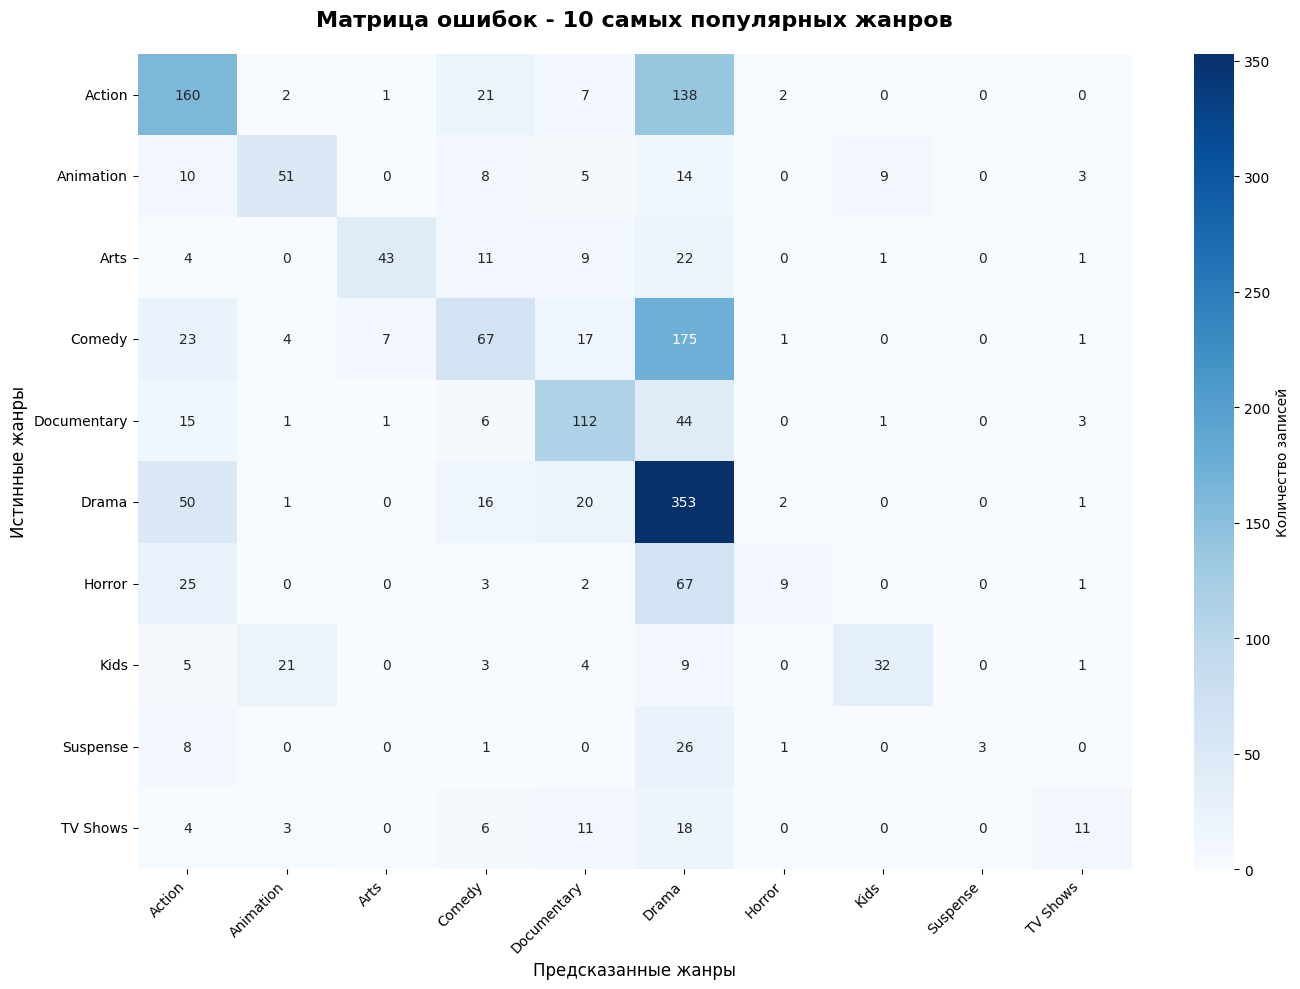

In [199]:
# Создаем первичный жанр
data_raw['primary_genre'] = data_raw['listed_in'].apply(lambda s: s.split(',')[0].strip())

# Берем только 10 самых популярных жанров
top_genres_count = 10
genre_counts = data_raw['primary_genre'].value_counts()
common_genres = genre_counts.head(top_genres_count).index
data_filtered = data_raw[data_raw['primary_genre'].isin(common_genres)]

print(f"Оставляем {len(common_genres)} самых популярных жанров:")
for i, (genre, count) in enumerate(genre_counts.head(top_genres_count).items(), 1):
    print(f"{i}. {genre}: {count} записей")

print(f"\nВсего записей после фильтрации: {len(data_filtered)}")
print(f"Количество классов: {data_filtered['primary_genre'].nunique()}")

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(
    data_filtered[['description','type','rating','country','release_year']],
    data_filtered['primary_genre'],
    test_size=0.2, random_state=42, stratify=data_filtered['primary_genre']
)

print(f"\nРазмер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")

# Дальше ваш код остается прежним...
X_train['type'] = X_train['type'].astype('category')
X_train['rating'] = X_train['rating'].astype('category')
X_test['type'] = X_test['type'].astype('category')
X_test['rating'] = X_test['rating'].astype('category')

enc = OneHotEncoder(drop='if_binary', sparse_output=False, handle_unknown='ignore')
enc.fit(X_train[['type','rating']])

train_cat = pd.DataFrame(enc.transform(X_train[['type','rating']]),
                         columns=enc.get_feature_names_out(),
                         index=X_train.index)
test_cat = pd.DataFrame(enc.transform(X_test[['type','rating']]),
                        columns=enc.get_feature_names_out(),
                        index=X_test.index)

train_countries = X_train['country'].str.split(',').apply(lambda x: [s.strip() for s in x] if isinstance(x, list) else [])
test_countries = X_test['country'].str.split(',').apply(lambda x: [s.strip() for s in x] if isinstance(x, list) else [])

mlb = MultiLabelBinarizer()
mlb.fit(train_countries)

train_country = pd.DataFrame(mlb.transform(train_countries), columns=mlb.classes_, index=X_train.index)
test_country = pd.DataFrame(mlb.transform(test_countries), columns=mlb.classes_, index=X_test.index)

X_train_cat = pd.concat([train_cat, train_country], axis=1)
X_test_cat = pd.concat([test_cat, test_country], axis=1)

tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X_train_text = tfidf.fit_transform(X_train['description'])
X_test_text = tfidf.transform(X_test['description'])

svd = TruncatedSVD(n_components=100, random_state=42)
X_train_svd = svd.fit_transform(X_train_text)
X_test_svd = svd.transform(X_test_text)

scaler = StandardScaler()
year_train = scaler.fit_transform(X_train[['release_year']])
year_test = scaler.transform(X_test[['release_year']])

X_train_full = np.hstack([X_train_svd, X_train_cat.values, year_train])
X_test_full = np.hstack([X_test_svd, X_test_cat.values, year_test])

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
rf.fit(X_train_full, y_train)

y_pred = rf.predict(X_test_full)
print("\nРезультаты для 10 самых популярных жанров:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print("\nClassification report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

# Визуализация результатов
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 10))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=rf.classes_,
            yticklabels=rf.classes_,
            cbar_kws={'label': 'Количество записей'})

plt.title('Матрица ошибок - 10 самых популярных жанров', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Предсказанные жанры', fontsize=12)
plt.ylabel('Истинные жанры', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()